In [1]:
# cell type metrics

In [2]:
import sys

sys.path.insert(1, "/dss/dsshome1/0C/ra98gaq/Git/cellseg-benchmark")

In [3]:
# noqa: E402

import argparse
import logging
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

# from cellseg_benchmark.cell_annotation_utils import flag_contamination, score_cell_types, annotate_cells_by_score
from cellseg_benchmark._constants import cell_type_colors
# warnings.filterwarnings("ignore")

In [4]:
# Logger setup
logger = logging.getLogger("metrics_cell_type")
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter("%(asctime)s [%(levelname)s]: %(message)s"))
logger.addHandler(handler)

In [5]:
parser = argparse.ArgumentParser(description="metrics_cell_type")
parser.add_argument("cohort", help="Cohort name, e.g., 'foxf2'")
# parser.add_argument("seg_method", help="Segmentation method, e.g., 'Cellpose_1_nuclei_model'")

# Simulate CLI args in Jupyter
args = parser.parse_args(["foxf2"])
print(args.cohort)

foxf2


In [6]:
# Paths
base_path = Path("/dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark")
analysis_path = base_path / "analysis" / args.cohort

results_path = base_path / "metrics" / args.cohort / "cell_type_metrics"
results_path.mkdir(parents=True, exist_ok=True)

plot_path = results_path / "plots"
plot_path.mkdir(parents=True, exist_ok=True)

from datetime import date  # noqa: E402

today = date.today().strftime("%Y%m%d")

In [7]:
os.listdir(analysis_path)

['Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8',
 'vpt_2D_DAPI_nuclei',
 'ComSeg',
 'Cellpose_1_nuclei_model',
 'Baysor_2D_Cellpose_2_DAPI_PolyT_0.2',
 'Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8',
 'Negative_Control_Rastered_5',
 'Cellpose_2_DAPI_PolyT',
 'Proseg_pure',
 'vpt_3D_DAPI_PolyT_nuclei',
 'Proseg_Cellpose_1_DAPI_Transcripts',
 'Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2',
 'Baysor_2D_Cellpose_1_DAPI_PolyT_0.2',
 'Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2',
 'Cellpose_1_DAPI_PolyT',
 'Negative_Control_Rastered_10',
 'Negative_Control_Voronoi',
 'vpt_3D_DAPI_nuclei',
 'Proseg_Cellpose_2_DAPI_Transcripts',
 'Proseg_Cellpose_1_nuclei_model',
 'Cellpose_2_DAPI_Transcripts',
 'Cellpose_1_Merlin',
 'Negative_Control_Rastered_25',
 'vpt_2D_DAPI_PolyT',
 'Cellpose_1_DAPI_Transcripts',
 'Baysor_2D_Cellpose_2_DAPI_PolyT_0.8',
 'Baysor_2D_Cellpose_1_nuclei_model_1.0',
 'vpt_2D_DAPI_PolyT_nuclei',
 'vpt_3D_DAPI_PolyT',
 'Proseg_Cellpose_2_DAPI_PolyT',
 'Baysor_2D_Cellpose_1_DAPI_PolyT_0.8',


In [14]:
seg_method = "vpt_2D_DAPI_nuclei"
adata_path = os.path.join(
    analysis_path, seg_method, "adatas", "adata_integrated.h5ad.gz"
)
adata = sc.read_h5ad(adata_path)

In [15]:
adata.obs["sample"].unique()

['foxf2_s7_r1', 'foxf2_s1_r1', 'foxf2_s1_r0', 'foxf2_s4_r0', 'foxf2_s7_r0', ..., 'foxf2_s2_r1', 'foxf2_s4_r1', 'foxf2_s6_r0', 'foxf2_s6_r1', 'foxf2_s5_r1']
Length: 13
Categories (13, object): ['foxf2_s1_r0', 'foxf2_s1_r1', 'foxf2_s2_r1', 'foxf2_s2_r2', ..., 'foxf2_s6_r1', 'foxf2_s6_r2', 'foxf2_s7_r0', 'foxf2_s7_r1']

In [25]:
seg_method = "Cellpose_1_nuclei_model"
adata_path = os.path.join(
    analysis_path, seg_method, "adatas", "adata_integrated_vascular.h5ad.gz"
)
adata_vasc = sc.read_h5ad(adata_path)

In [26]:
adata_vasc.obs.columns

Index(['region', 'slide', 'cell_type_mmc_incl_low_quality_revised',
       'cell_type_mmc_incl_low_quality_clusters',
       'cell_type_mmc_incl_low_quality', 'cell_type_mmc_incl_mixed_revised',
       'cell_type_mmc_incl_mixed_clusters', 'cell_type_mmc_incl_mixed',
       'cell_type_mmc_raw_revised', 'cell_type_mmc_raw_clusters',
       'cell_type_mmc_raw', 'area', 'volume_sum', 'volume_final',
       'num_z_planes', 'size_normalized', 'surface_to_volume_ratio',
       'sphericity', 'solidity', 'elongation', 'cohort', 'sample', 'age',
       'genotype', 'condition', 'n_counts', 'n_genes', 'spatial_outlier',
       'low_quality_cell', 'volume_outlier_cell', 'fov', 'contaminated',
       'contaminated_Immune', 'contaminated_Neuronal',
       'contaminated_Astrocytes', 'contaminated_Oligodendrocytes',
       'score_aECs', 'score_capECs', 'score_vECs', 'cell_type_incl_zonation'],
      dtype='object')

In [27]:
adata_vasc.obs.cell_type_incl_zonation.value_counts()

cell_type_incl_zonation
otherECs     18740
capECs       14043
Pericytes     9531
aECs          8718
vECs          4386
VLMCs         4267
SMCs          2043
BAMs          1424
Name: count, dtype: int64

In [ ]:
adata.obs["cell_type_mmc_raw_revised"]

# Cell Type Proportion and Unannotated Cell Fraction

In [8]:
import os
from datetime import date
from pathlib import Path

import scanpy as sc


def plot_cell_type_distribution_by_segmentation(
    analysis_path: Path,
    results_path: Path,
    cell_type_col: str,
    adata_filename: str,
    cell_type_colors: dict,
    today: str,
):
    plot_path = results_path / "plots"
    plot_path.mkdir(parents=True, exist_ok=True)

    legend_order = list(cell_type_colors.keys())
    all_distributions = {}

    for seg_method in os.listdir(analysis_path):
        seg_path = analysis_path / seg_method / "adatas" / adata_filename
        if not seg_path.exists():
            print(f" No {cell_type_col} in {seg_method}")
            continue
        try:
            print(f"Processing {seg_method}")
            adata = sc.read_h5ad(seg_path)
            if cell_type_col not in adata.obs.columns:
                continue
            counts = adata.obs[cell_type_col].value_counts().dropna()
            all_distributions[seg_method] = counts
        except Exception as e:
            print(f"Error processing {seg_method}: {e}")

    df_counts = pd.DataFrame(all_distributions).fillna(0).astype(int)
    df_counts = df_counts.reindex([ct for ct in legend_order if ct in df_counts.index])

    df_counts.to_csv(results_path / f"{cell_type_col}_counts.csv")

    df_pct = df_counts.div(df_counts.sum(axis=0), axis=1) * 100
    if "Undefined" in df_pct.index:
        cols_sorted = df_pct.loc["Undefined"].sort_values(ascending=False).index
        df_pct = df_pct[cols_sorted]
        df_counts = df_counts[cols_sorted]

    df_pct = df_pct[::-1]
    colors = [cell_type_colors[ct] for ct in df_pct.index]

    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
    df_pct.T.plot(kind="bar", stacked=True, ax=ax, color=colors, width=0.8)

    ax.set_ylabel("% of Cells", fontsize=14)
    ax.set_xlabel("Segmentation Method", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    from matplotlib.patches import Patch

    legend_labels = df_pct[::-1].index.tolist()
    legend_colors = [cell_type_colors[ct] for ct in legend_labels]
    handles = [
        Patch(facecolor=color, label=label)
        for color, label in zip(legend_colors, legend_labels)
    ]

    ax.legend(
        handles=handles,
        title="Cell Type",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        fontsize=9,
    )
    plt.tight_layout()

    fig.savefig(plot_path / f"{cell_type_col}_distribution_{today}.png")
    plt.close(fig)

## Main cell types

In [9]:
%%time

analysis_path = (
    Path("/dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark")
    / "analysis"
    / args.cohort
)
results_path = (
    Path("/dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark")
    / "metrics"
    / args.cohort
    / "cell_type_metrics"
)

cell_type_col = "cell_type_mmc_raw_revised"
adata_filename = "adata_integrated.h5ad.gz"

plot_cell_type_distribution_by_segmentation(
    analysis_path=analysis_path,
    results_path=results_path,
    cell_type_col=cell_type_col,
    adata_filename=adata_filename,
    cell_type_colors=cell_type_colors,
    today=today,
)

 No cell_type_mmc_raw_revised in Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8
Processing vpt_2D_DAPI_nuclei
Processing ComSeg
Processing Cellpose_1_nuclei_model
 No cell_type_mmc_raw_revised in Baysor_2D_Cellpose_2_DAPI_PolyT_0.2
 No cell_type_mmc_raw_revised in Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8
Processing Negative_Control_Rastered_5
Processing Cellpose_2_DAPI_PolyT
Processing Proseg_pure
Processing vpt_3D_DAPI_PolyT_nuclei
 No cell_type_mmc_raw_revised in Proseg_Cellpose_1_DAPI_Transcripts
Processing Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2
Processing Baysor_2D_Cellpose_1_DAPI_PolyT_0.2
 No cell_type_mmc_raw_revised in Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2
Processing Cellpose_1_DAPI_PolyT
Processing Negative_Control_Rastered_10
Processing Negative_Control_Voronoi
Processing vpt_3D_DAPI_nuclei
Processing Proseg_Cellpose_2_DAPI_Transcripts
Processing Proseg_Cellpose_1_nuclei_model
Processing Cellpose_2_DAPI_Transcripts
 No cell_type_mmc_raw_revised in Cellpose_1_Merlin
Process

## Vasc subtypes

In [ ]:
%%time

cell_type_col = "cell_type_incl_zonation"
adata_filename = "adata_integrated_vascular.h5ad.gz"

# Use same color map or adjust as needed
plot_cell_type_distribution_by_segmentation(
    analysis_path=analysis_path,
    results_path=results_path,
    cell_type_col=cell_type_col,
    adata_filename=adata_filename,
    cell_type_colors=cell_type_colors,
    today=today,
)

 No cell_type_incl_zonation in Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8
Processing vpt_2D_DAPI_nuclei
Processing ComSeg
Processing Cellpose_1_nuclei_model
 No cell_type_incl_zonation in Baysor_2D_Cellpose_2_DAPI_PolyT_0.2
 No cell_type_incl_zonation in Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8
Processing Negative_Control_Rastered_5
Processing Cellpose_2_DAPI_PolyT
Processing Proseg_pure
Processing vpt_3D_DAPI_PolyT_nuclei
 No cell_type_incl_zonation in Proseg_Cellpose_1_DAPI_Transcripts
 No cell_type_incl_zonation in Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2
Processing Baysor_2D_Cellpose_1_DAPI_PolyT_0.2
 No cell_type_incl_zonation in Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2
Processing Cellpose_1_DAPI_PolyT
Processing Negative_Control_Rastered_10
Processing Negative_Control_Voronoi
Processing vpt_3D_DAPI_nuclei
 No cell_type_incl_zonation in Proseg_Cellpose_2_DAPI_Transcripts
Processing Proseg_Cellpose_1_nuclei_model
Processing Cellpose_2_DAPI_Transcripts
 No cell_type_incl_zonation 

# Clustering quality

In [11]:
#

In [12]:
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, silhouette_score


def compute_clustering_scores(
    adata, cell_type_column="cell_type_final", sample_size=10000, n_pcs=30
):
    if cell_type_column not in adata.obs:
        raise ValueError(f"Column '{cell_type_column}' not found in adata.obs.")

    # Subset and downsample
    X = adata.X
    labels = adata.obs[cell_type_column]

    if adata.shape[0] > sample_size:
        idx = np.random.choice(adata.shape[0], sample_size, replace=False)
        X = X[idx]
        labels = labels.iloc[idx]

    if pd.isna(labels).any():
        valid = ~pd.isna(labels)
        X = X[valid]
        labels = labels[valid]

    if len(np.unique(labels)) < 2:
        return np.nan, np.nan

    # Use PCA-reduced data
    pca = PCA(n_components=min(n_pcs, X.shape[1]))
    X_pca = pca.fit_transform(X)

    ch = calinski_harabasz_score(X_pca, labels)
    sh = silhouette_score(X_pca, labels)
    return ch, sh

In [13]:
# Config
cohort = args.cohort
analysis_path = (
    Path("/dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark") / "analysis" / cohort
)
adata_filename = "adata_integrated.h5ad.gz"
cell_type_column = "cell_type_mmc_raw_revised"

In [14]:
%%time
# Loop and collect
clustering_scores = {}
for seg_method in os.listdir(analysis_path):
    path = analysis_path / seg_method / "adatas" / adata_filename
    print(f"Processing {seg_method}")
    if not path.exists():
        continue
    try:
        adata = sc.read_h5ad(path)
        ch, sh = compute_clustering_scores(adata, cell_type_column)
        clustering_scores[seg_method] = {
            "calinski_harabasz_score": float(ch),
            "silhouette_score": float(sh),
        }
    except Exception as e:
        print(f"{seg_method}: {e}")

# To DataFrame
scores_df = pd.DataFrame.from_dict(clustering_scores, orient="index")

Processing Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8
Processing vpt_2D_DAPI_nuclei
Processing ComSeg
Processing Cellpose_1_nuclei_model
Processing Baysor_2D_Cellpose_2_DAPI_PolyT_0.2
Processing Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8
Processing Negative_Control_Rastered_5
Processing Cellpose_2_DAPI_PolyT
Processing Proseg_pure
Processing vpt_3D_DAPI_PolyT_nuclei
Processing Proseg_Cellpose_1_DAPI_Transcripts
Processing Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2
Processing Baysor_2D_Cellpose_1_DAPI_PolyT_0.2
Processing Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2
Processing Cellpose_1_DAPI_PolyT
Processing Negative_Control_Rastered_10
Processing Negative_Control_Voronoi
Processing vpt_3D_DAPI_nuclei
Processing Proseg_Cellpose_2_DAPI_Transcripts
Processing Proseg_Cellpose_1_nuclei_model
Processing Cellpose_2_DAPI_Transcripts
Processing Cellpose_1_Merlin
Processing Negative_Control_Rastered_25
Processing vpt_2D_DAPI_PolyT
Processing Cellpose_1_DAPI_Transcripts
Processing Baysor_2D_Cellpose_2

In [18]:
scores_df

,calinski_harabasz_score,silhouette_score
vpt_2D_DAPI_nuclei,830.991151,0.186349
ComSeg,621.404109,0.106007
Cellpose_1_nuclei_model,735.581788,0.144983
Negative_Control_Rastered_5,226.781819,-0.075858
Cellpose_2_DAPI_PolyT,440.001251,0.056528
Proseg_pure,403.520742,0.041197
vpt_3D_DAPI_PolyT_nuclei,156.755099,-0.027675
Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2,398.422083,0.016382
Baysor_2D_Cellpose_1_DAPI_PolyT_0.2,385.439099,-0.024064
Cellpose_1_DAPI_PolyT,568.100708,0.103907


In [16]:
scores_df.to_csv(results_path / "clustering_scores.csv")

/tmp/ipykernel_3687783/2132662917.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3687783/2132662917.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


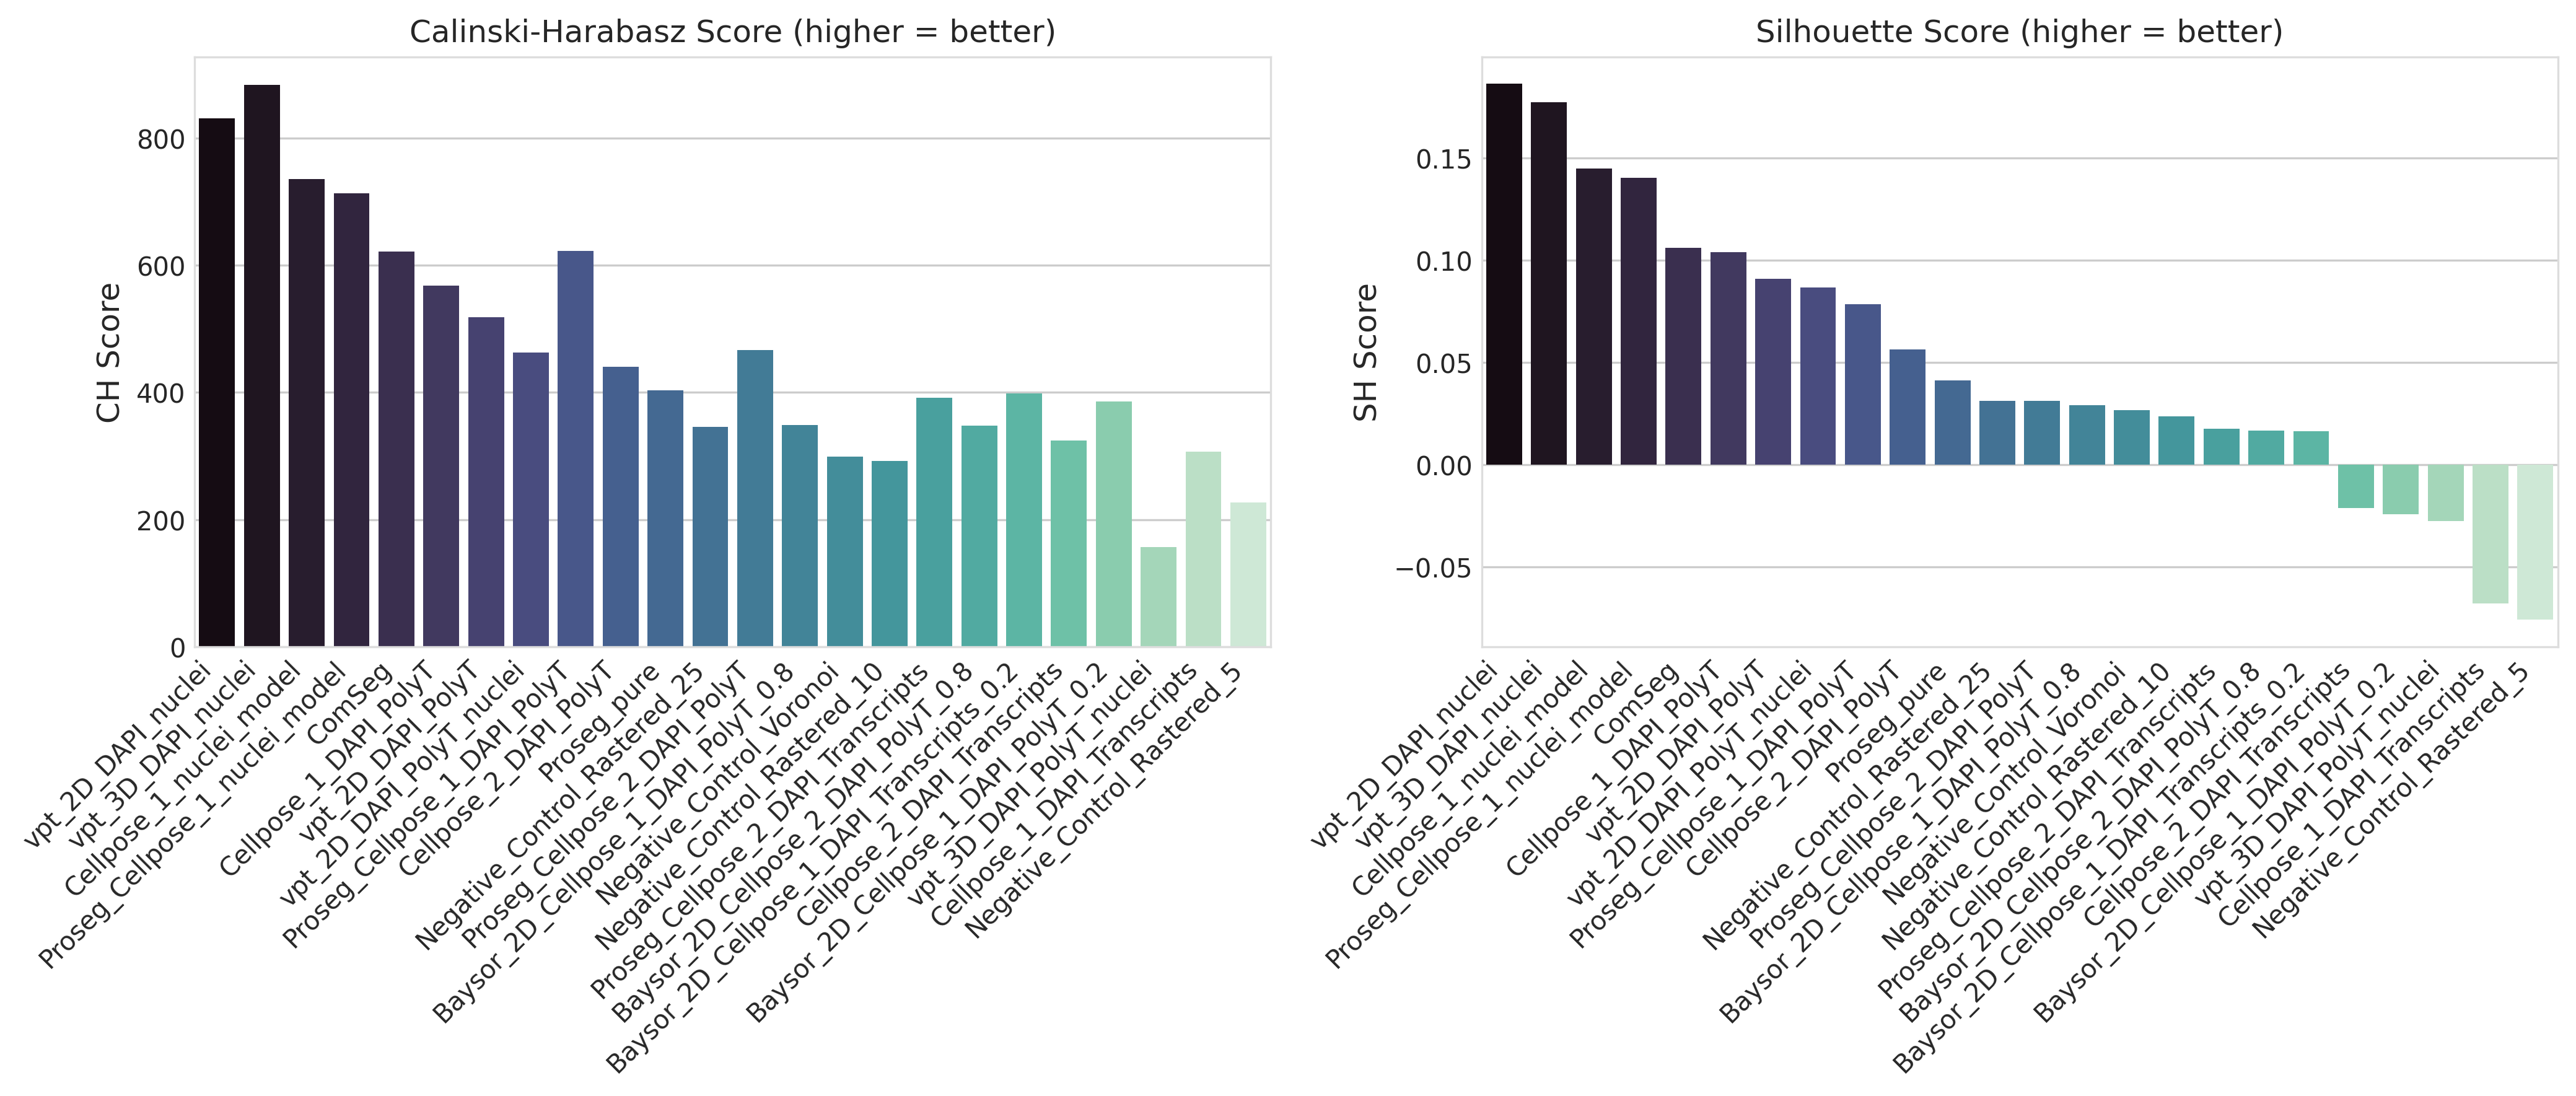

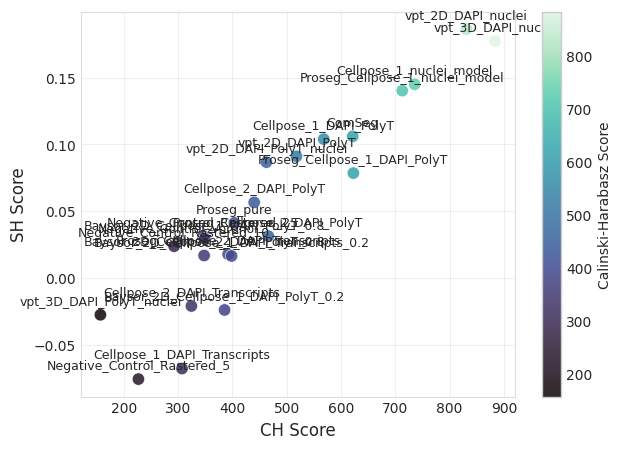

In [17]:
import pandas as pd
import seaborn as sns

# Set Seaborn theme
plt.style.use("seaborn-v0_8-whitegrid")

# Sort scores by Silhouette score
sorted_df = scores_df.sort_values("silhouette_score", ascending=False)

# Define color palette based on SH score ranking
custom_palette = sns.color_palette("mako", n_colors=len(sorted_df))
custom_cmap = sns.color_palette("mako", as_cmap=True)

# === Bar Plots Side-by-Side ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# CH Score Plot
sns.barplot(
    x=sorted_df.index,
    y="calinski_harabasz_score",
    data=sorted_df,
    palette=custom_palette,
    ax=ax1,
)
ax1.set_title("Calinski-Harabasz Score (higher = better)", fontsize=12)
ax1.set_ylabel("CH Score", fontsize=12)
ax1.set_xlabel("")
ax1.set_xticks(np.arange(len(sorted_df.index)))
ax1.set_xticklabels(sorted_df.index, rotation=45, ha="right", fontweight="medium")

# SH Score Plot
sns.barplot(
    x=sorted_df.index,
    y="silhouette_score",
    data=sorted_df,
    palette=custom_palette,
    ax=ax2,
)
ax2.set_title("Silhouette Score (higher = better)", fontsize=12)
ax2.set_ylabel("SH Score", fontsize=12)
ax2.set_xlabel("")
ax2.set_xticks(np.arange(len(sorted_df.index)))
ax2.set_xticklabels(sorted_df.index, rotation=45, ha="right", fontweight="medium")

# Border styling
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor("#dddddd")
        spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()

# === Scatter Plot of SH vs CH Scores ===
plt.figure(figsize=(7, 5))

# Normalize for colormap
norm = plt.Normalize(
    sorted_df["calinski_harabasz_score"].min(),
    sorted_df["calinski_harabasz_score"].max(),
)

# Scatter with consistent colormap
scatter = plt.scatter(
    sorted_df["calinski_harabasz_score"],
    sorted_df["silhouette_score"],
    c=sorted_df["calinski_harabasz_score"],
    cmap="mako",
    s=80,
    alpha=0.85,
    edgecolor="white",
    linewidth=0.5,
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Calinski-Harabasz Score", fontsize=10)

# Annotate points
for i, txt in enumerate(sorted_df.index):
    plt.annotate(
        txt,
        (
            sorted_df["calinski_harabasz_score"].iloc[i],
            sorted_df["silhouette_score"].iloc[i],
        ),
        fontsize=9,
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.xlabel("CH Score", fontsize=12)
plt.ylabel("SH Score", fontsize=12)
plt.grid(True, alpha=0.3)

# Light border
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#dddddd")
    spine.set_linewidth(0.8)

fig.tight_layout()
fig.savefig(results_path / "plots" / "clustering_scores_bars.png", bbox_inches="tight")
plt.show()

# Marker gene F1 score

In [19]:
import os

In [20]:
# load marker genes
# from Allen mouse brain scRNA-seq atlas (Yao 2023 Nature, 4M cells)
# computed using edgeR of pseudobulks, using author-derived cell annotations (see separate script)
ABCAtlas_marker_df = pd.read_csv(
    os.path.join(
        base_path,
        "misc",
        "scRNAseq_ref_ABCAtlas_Yao2023Nature",
        "marker_genes_df",
        "20250416_cell_type_markers_top50.csv",
    )
)
ABCAtlas_marker_df.head(3)

,Choroid-Plexus,BAMs,Ependymal,SMCs,Microglia,Pericytes,VLMCs,Immune-Other,ECs,ABCs,...,Neurons-Granule-Immature,Astroependymal,Astrocytes,Neurons-Other,Tanycytes,Bergmann,Neurons-Dopa-Gaba,Neurons-Gaba,Neurons-Glyc-Gaba,Neurons-Glut
0,Ttr,Pf4,Ccdc153,Acta2,Tnf,Higd1b,Slc6a13,Mir142hg,Ly6c1,Mgp,...,Dlx6os1,Gfap,Atp13a4,Slc18a2,Six3,Gpr37l1,Chrm2,Dlx6os1,Pvalb,Slc17a6
1,Igf2,Cd163,Tmem212,Myh11,Mir142hg,Abcc9,Dcn,Lyz2,Adgrl4,Tbx18,...,Gm38505,Aqp4,Gm12239,Ddc,Dnah12,Slc1a3,Dlk1,Pvalb,Slc32a1,Nrg3os
2,Enpp2,F13a1,Dnah12,Tagln,Siglech,Ndufa4l2,Tbx18,Ikzf1,Slco1a4,Fn1,...,Sox11,Agt,Gm20713,Dlk1,Col23a1,S1pr1,Nxph1,Vip,Gm32647,Slc17a7


In [21]:
# turn ABCAtlas_marker_df to dict
cell_types = ABCAtlas_marker_df.columns.tolist()
marker_dict = {}
for cell_type in cell_types:
    # Skip the index column (0) if present
    if cell_type == "0":
        continue
    # Get values from column, excluding the header row
    genes = ABCAtlas_marker_df[cell_type].iloc[0:].tolist()
    # Remove any NaN values
    genes = [gene for gene in genes if pd.notna(gene)]
    marker_dict[cell_type] = genes

In [22]:
sorted(ABCAtlas_marker_df.columns)

['ABCs',
 'Astrocytes',
 'Astroependymal',
 'BAMs',
 'Bergmann',
 'Choroid-Plexus',
 'ECs',
 'Ependymal',
 'Immune-Other',
 'Microglia',
 'Neurons-Dopa',
 'Neurons-Dopa-Gaba',
 'Neurons-Gaba',
 'Neurons-Glut',
 'Neurons-Glyc-Gaba',
 'Neurons-Granule-Immature',
 'Neurons-Other',
 'OECs',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Tanycytes',
 'VLMCs']

In [12]:
sorted(adata.obs["cell_type_mmc_raw_revised"].unique().tolist())

NameError: name 'adata' is not defined

## Cross F1

In [28]:
def compute_cross_f1_scores(adata, cell_type_col, marker_dict, layer=None, threshold=3):
    """
    Fast computation of F1 scores between all cell types and marker genes.

    Parameters:
        adata : AnnData
        cell_type_col : str
        marker_dict : dict
        layer : str, optional
        threshold : float, expression threshold (default=3)

    Returns:
        pd.DataFrame with F1 scores and related metrics
    """
    import numpy as np
    import pandas as pd
    from scipy import sparse

    if cell_type_col not in adata.obs.columns:
        raise ValueError(f"'{cell_type_col}' not in adata.obs")

    if layer:
        if layer not in adata.layers:
            raise ValueError(f"Layer '{layer}' not found")
        X = adata.layers[layer]
    else:
        X = adata.X

    if sparse.issparse(X):
        X = X.tocsr()

    # Unique cell types and all marker genes
    all_cell_types = np.unique(adata.obs[cell_type_col].values)
    all_markers = sorted(
        set(g for genes in marker_dict.values() for g in genes if g in adata.var_names)
    )

    gene_indices = {gene: adata.var_names.get_loc(gene) for gene in all_markers}

    # Precompute expression masks: cells x marker genes (binary)
    expr_matrix = X[:, [gene_indices[g] for g in all_markers]]
    expr_mask = expr_matrix > threshold  # sparse boolean matrix

    # Convert obs cell type to numpy array once
    obs_cell_types = np.array(adata.obs[cell_type_col])

    results = []

    for i, cell_type in enumerate(all_cell_types):
        target_mask = obs_cell_types == cell_type

        for j, gene in enumerate(all_markers):
            gene_expr = (
                expr_mask[:, j].toarray().ravel()
                if sparse.issparse(expr_mask)
                else expr_mask[:, j]
            )

            tp = np.sum(target_mask & gene_expr)
            fp = np.sum(~target_mask & gene_expr)
            fn = np.sum(target_mask & ~gene_expr)

            precision = tp / (tp + fp) if (tp + fp) else 0
            recall = tp / (tp + fn) if (tp + fn) else 0
            f1 = (
                2 * precision * recall / (precision + recall)
                if (precision + recall)
                else 0
            )

            results.append(
                {
                    "cell_type": cell_type,
                    "marker_gene": gene,
                    "f1_score": f1,
                    "precision": precision,
                    "recall": recall,
                    "tp": tp,
                    "fp": fp,
                    "fn": fn,
                }
            )

    return pd.DataFrame(results)

In [42]:
%%time
# Step 2: Compute F1 scores
f1_df = compute_cross_f1_scores(
    adata,
    cell_type_col="cell_type_mmc_raw_revised",
    marker_dict=marker_dict,
    layer="volume_log1p_norm",
    threshold=1.5,
)

CPU times: user 1min 12s, sys: 36 ms, total: 1min 12s
Wall time: 1min 12s


In [43]:
f1_df

,cell_type,marker_gene,f1_score,precision,recall,tp,fp,fn
0,ABCs,Abcb1a,0.000348,0.000174,0.194444,7,40225,29
1,ABCs,Abcc9,0.000000,0.000000,0.000000,0,5241,36
2,ABCs,Acta2,0.000000,0.000000,0.000000,0,3782,36
3,ABCs,Aif1,0.000000,0.000000,0.000000,0,621,36
4,ABCs,Apod,0.000157,0.000079,0.083333,3,38075,33
...,...,...,...,...,...,...,...,...
2965,VLMCs,Trf,0.021707,0.011485,0.197417,1804,155269,7334
2966,VLMCs,Vcam1,0.066583,0.101825,0.049464,452,3987,8686
2967,VLMCs,Vcan,0.003440,0.003756,0.003174,29,7693,9109
2968,VLMCs,Vip,0.001431,0.002615,0.000985,9,3433,9129


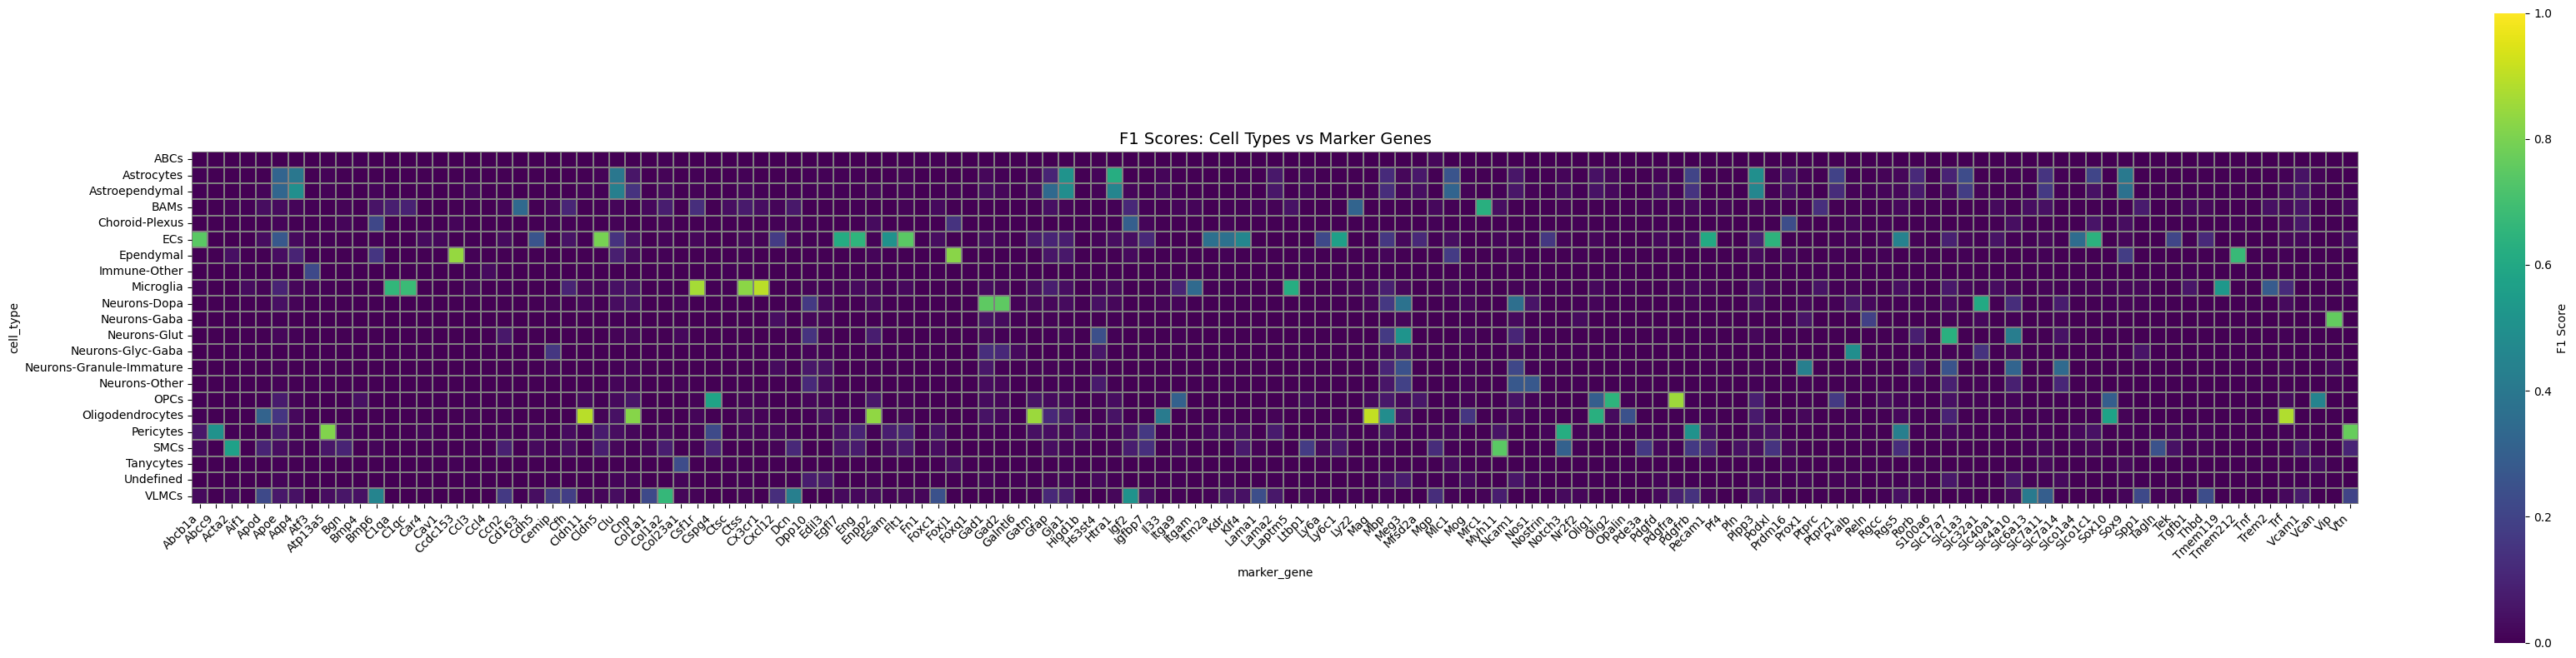

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = f1_df.pivot(index="cell_type", columns="marker_gene", values="f1_score")

plt.figure(figsize=(35, 8))
sns.heatmap(
    heatmap_data,
    cmap="viridis",
    vmin=0,
    vmax=1,
    linewidths=0.3,
    linecolor="gray",
    square=True,
    cbar_kws={"label": "F1 Score"},
)
plt.title("F1 Scores: Cell Types vs Marker Genes", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

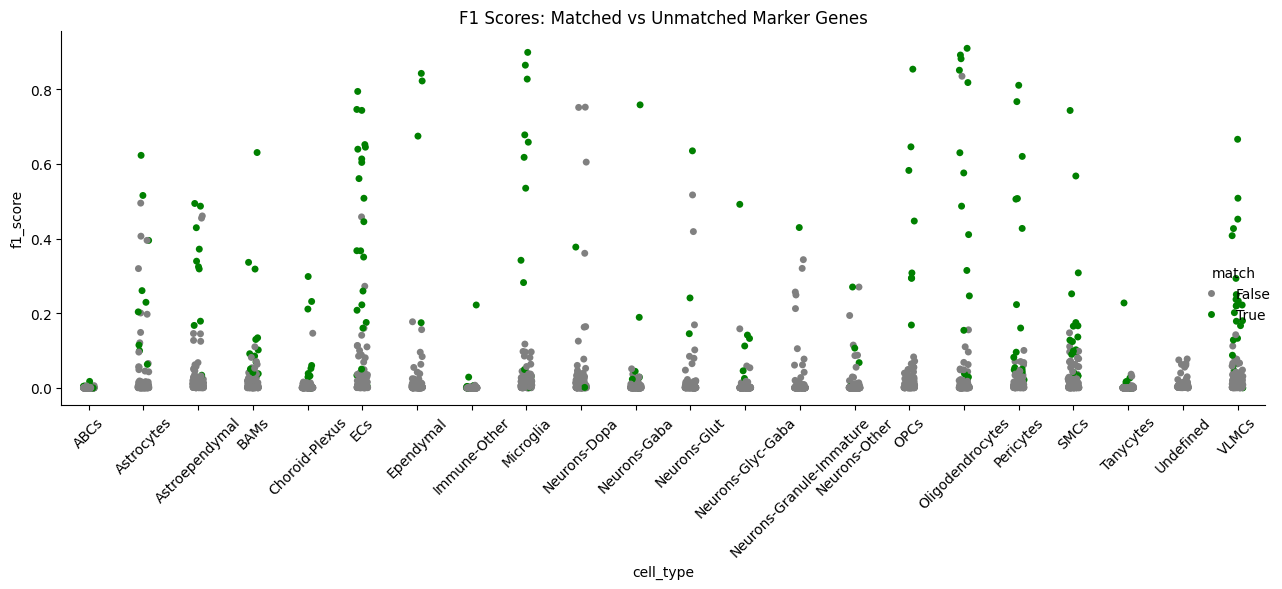

In [47]:
# Add a column to mark whether the marker is intended for that cell type
f1_df["match"] = f1_df.apply(
    lambda row: row["marker_gene"] in marker_dict.get(row["cell_type"], []), axis=1
)

# Example: dotplot for matched vs unmatched
sns.catplot(
    data=f1_df,
    kind="strip",
    x="cell_type",
    y="f1_score",
    hue="match",
    palette={True: "green", False: "gray"},
    height=6,
    aspect=2,
)
plt.title("F1 Scores: Matched vs Unmatched Marker Genes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

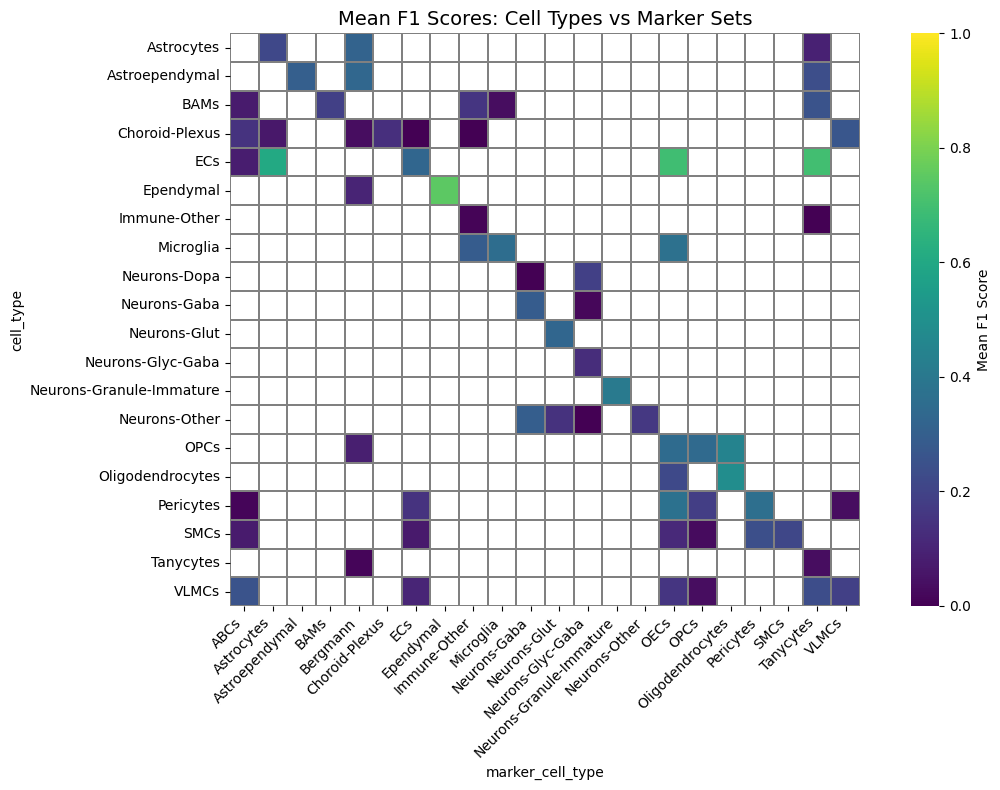

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, map each marker gene to its marker cell type
gene_to_marker_type = {
    gene: cell_type for cell_type, genes in marker_dict.items() for gene in genes
}

# Add that info to f1_df
f1_df["marker_cell_type"] = f1_df["marker_gene"].map(gene_to_marker_type)

# Drop rows where marker_gene wasn't in marker_dict (just in case)
f1_df = f1_df.dropna(subset=["marker_cell_type"])

# Now group by actual cell_type (from adata.obs) × marker_cell_type and average F1
grouped = (
    f1_df.groupby(["cell_type", "marker_cell_type"])["f1_score"].mean().reset_index()
)

# Pivot to matrix format for heatmap
heatmap_data = grouped.pivot(
    index="cell_type", columns="marker_cell_type", values="f1_score"
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="viridis",
    vmin=0,
    vmax=1,
    linewidths=0.3,
    linecolor="gray",
    square=True,
    cbar_kws={"label": "Mean F1 Score"},
)
plt.title("Mean F1 Scores: Cell Types vs Marker Sets", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Matching F1

In [26]:
def compute_matching_f1_scores(
    adata, cell_type_col, marker_dict, layer=None, threshold=3
):
    """
    Compute F1 scores for matching marker–cell type pairs only.

    Parameters:
        adata : AnnData
        cell_type_col : str
        marker_dict : dict(cell_type -> [marker genes])
        layer : str or None
        threshold : float, expression threshold in log-normalized space

    Returns:
        pd.DataFrame with F1 scores and related metrics
    """
    import numpy as np
    import pandas as pd
    from scipy import sparse

    # Use the specified layer or adata.X
    X = adata.layers[layer] if layer else adata.X
    if not sparse.issparse(X):
        X = sparse.csr_matrix(X)

    obs_cell_types = adata.obs[cell_type_col].astype(str).values
    present_cell_types = set(obs_cell_types)
    marker_cell_types = set(marker_dict)

    unmatched = present_cell_types - marker_cell_types
    if unmatched:
        print(
            f" Note: {len(unmatched)} cell type(s) from adata not in marker_dict: {sorted(unmatched)}"
        )

    results = []

    for cell_type, markers in marker_dict.items():
        if cell_type not in present_cell_types:
            continue  # skip if cell type not in adata

        target_mask = obs_cell_types == cell_type
        other_mask = ~target_mask

        for gene in markers:
            if gene not in adata.var_names:
                continue

            gene_idx = adata.var_names.get_loc(gene)
            expr = X[:, gene_idx].toarray().ravel()
            expressed = expr > threshold

            tp = np.sum(target_mask & expressed)
            fp = np.sum(other_mask & expressed)
            fn = np.sum(target_mask & ~expressed)

            precision = tp / (tp + fp) if (tp + fp) else 0
            recall = tp / (tp + fn) if (tp + fn) else 0
            f1 = (
                2 * precision * recall / (precision + recall)
                if (precision + recall)
                else 0
            )

            results.append(
                {
                    "cell_type": cell_type,
                    "marker_gene": gene,
                    "f1_score": f1,
                    "precision": precision,
                    "recall": recall,
                    "tp": tp,
                    "fp": fp,
                    "fn": fn,
                }
            )

    return pd.DataFrame(results)

In [55]:
%%time
f1_df = compute_matching_f1_scores(
    adata,
    cell_type_col="cell_type_mmc_raw_revised",
    marker_dict=marker_dict,
    layer="volume_log1p_norm",
    threshold=1.5,
)

⚠️ Warning: 1 cell types in adata not in marker_dict: ['Undefined']
CPU times: user 26.8 s, sys: 3.95 ms, total: 26.8 s
Wall time: 26.8 s


In [56]:
f1_df

,cell_type,marker_gene,f1_score,precision,recall,tp,fp,fn
0,Choroid-Plexus,Igf2,0.298252,0.179723,0.875943,2090,9539,296
1,Choroid-Plexus,Enpp2,0.029009,0.014738,0.913663,2180,145732,206
2,Choroid-Plexus,Slco1c1,0.051985,0.027262,0.558256,1332,47528,1054
3,Choroid-Plexus,Slc4a10,0.038619,0.019776,0.818944,1954,96853,432
4,Choroid-Plexus,Vcam1,0.060073,0.046182,0.085918,205,4234,2181
...,...,...,...,...,...,...,...,...
224,Neurons-Glyc-Gaba,Gad1,0.132427,0.071225,0.941147,7484,97592,468
225,Neurons-Glyc-Gaba,Meg3,0.045750,0.023417,0.987928,7856,327626,96
226,Neurons-Glut,Slc17a7,0.634764,0.469066,0.981467,117675,133196,2222
227,Neurons-Glut,Hs3st4,0.240878,0.666201,0.147018,17627,8832,102270


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_f1_scores_by_cell_type(f1_df, top_n=20):
    """
    Plot F1 scores for matching marker genes per cell type.

    Parameters:
        f1_df : DataFrame returned by compute_matching_f1_scores()
        top_n : int, max number of marker genes per plot (optional)
    """
    cell_types = f1_df["cell_type"].unique()
    n = len(cell_types)
    n_cols = 2
    n_rows = (n + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), squeeze=False)

    for i, cell_type in enumerate(cell_types):
        ax = axes[i // n_cols][i % n_cols]
        data = f1_df[f1_df["cell_type"] == cell_type]
        data = data.sort_values("f1_score", ascending=False).head(top_n)

        sns.barplot(data=data, x="f1_score", y="marker_gene", ax=ax, palette="viridis")
        ax.set_title(f"{cell_type} (Top {top_n})")
        ax.set_xlim(0, 1)
        ax.set_xlabel("F1 Score")
        ax.set_ylabel("Marker Gene")

    # Remove empty axes
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols][j % n_cols])

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1616011/307285769.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1616011/307285769.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1616011/307285769.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1616011/307285769.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1616011/307285769.py:24: FutureWa

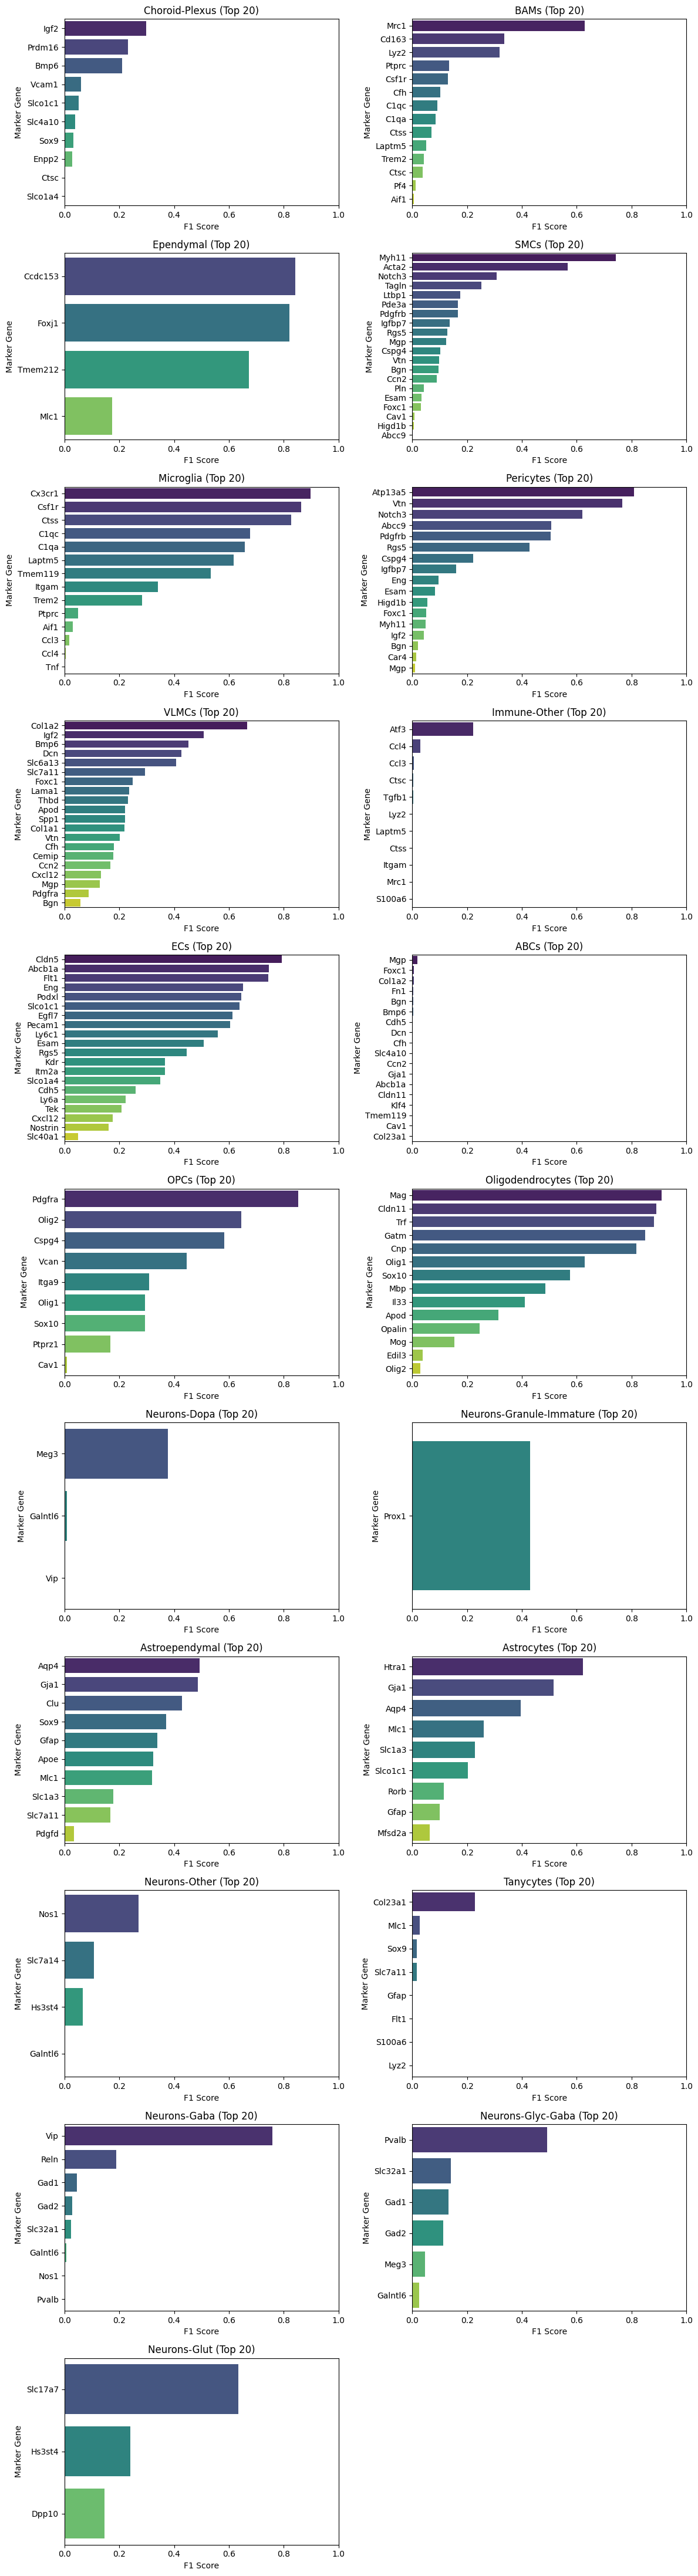

In [58]:
plot_f1_scores_by_cell_type(f1_df)

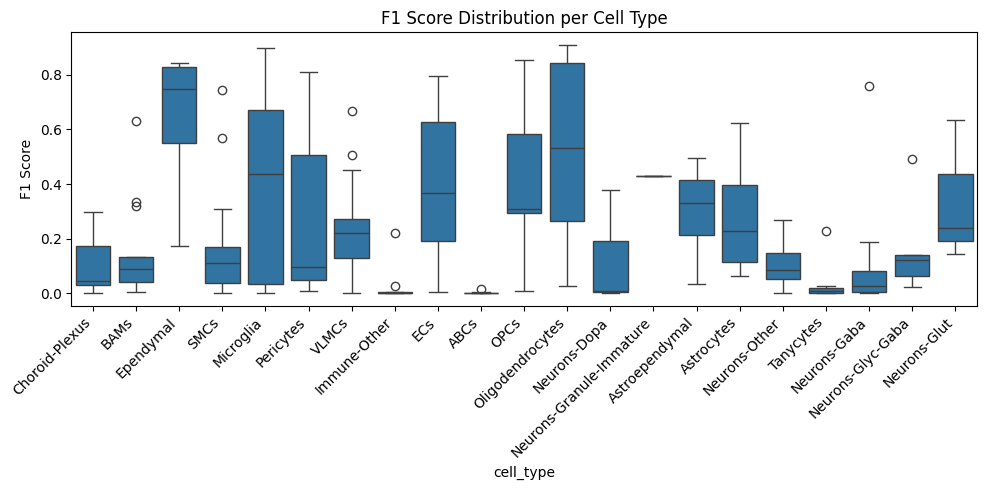

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=f1_df, x="cell_type", y="f1_score")
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1 Score")
plt.title("F1 Score Distribution per Cell Type")
plt.tight_layout()
plt.show()

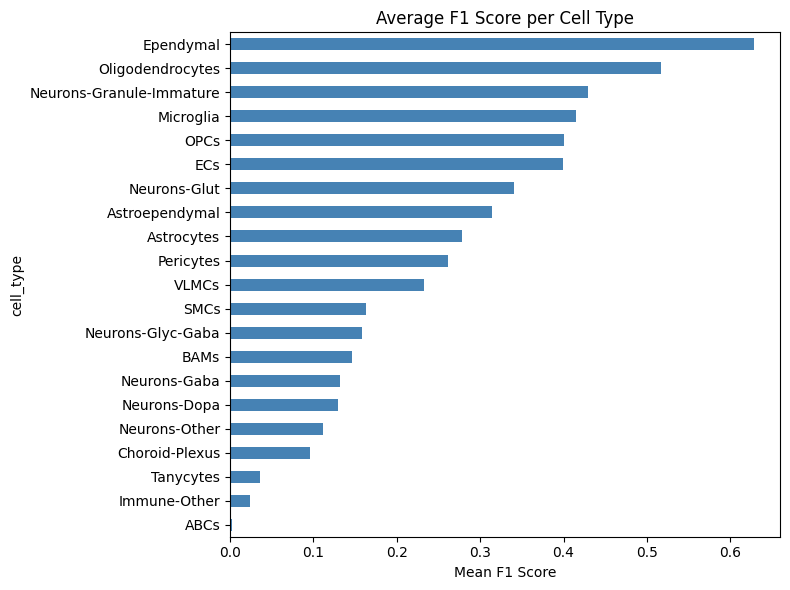

In [60]:
mean_f1 = f1_df.groupby("cell_type")["f1_score"].mean().sort_values()

mean_f1.plot.barh(figsize=(8, 6), color="steelblue")
plt.xlabel("Mean F1 Score")
plt.title("Average F1 Score per Cell Type")
plt.tight_layout()
plt.show()

## Loop seg_methods

In [28]:
vascular_types = ["ECs", "SMCs", "Pericytes", "VLMCs"]

In [29]:
analysis_path

PosixPath('/dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/analysis/foxf2')

In [30]:
%%time

import os

import pandas as pd
import scanpy as sc

all_f1 = []

for seg_method in os.listdir(analysis_path):
    adata_path = os.path.join(
        analysis_path, seg_method, "adatas", "adata_integrated.h5ad.gz"
    )
    if not os.path.exists(adata_path):
        continue
    print(f"Processing {seg_method}")
    adata = sc.read_h5ad(adata_path)

    f1_df = compute_matching_f1_scores(
        adata,
        cell_type_col="cell_type_mmc_raw_revised",
        marker_dict=marker_dict,
        layer="volume_log1p_norm",
        threshold=1.5,
    )
    f1_df["seg_method"] = seg_method
    all_f1.append(f1_df)

# Combine into one DataFrame
f1_all = pd.concat(all_f1, ignore_index=True)

Processing vpt_2D_DAPI_nuclei
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing ComSeg
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Cellpose_1_nuclei_model
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Negative_Control_Rastered_5
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Cellpose_2_DAPI_PolyT
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Proseg_pure
 Note: 2 cell type(s) from adata not in marker_dict: ['Undefined', np.str_('nan')]
Processing vpt_3D_DAPI_PolyT_nuclei
 Note: 2 cell type(s) from adata not in marker_dict: ['Undefined', np.str_('nan')]
Processing Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2
 Note: 1 cell type(s) from adata not in marker_dict: ['Undefined']
Processing Cellpose_1_DAPI_PolyT
 Note: 1 cel

In [31]:
f1_all.head()

,cell_type,marker_gene,f1_score,precision,recall,tp,fp,fn,seg_method
0,Choroid-Plexus,Igf2,0.298252,0.179723,0.875943,2090,9539,296,vpt_2D_DAPI_nuclei
1,Choroid-Plexus,Enpp2,0.029009,0.014738,0.913663,2180,145732,206,vpt_2D_DAPI_nuclei
2,Choroid-Plexus,Slco1c1,0.051985,0.027262,0.558256,1332,47528,1054,vpt_2D_DAPI_nuclei
3,Choroid-Plexus,Slc4a10,0.038619,0.019776,0.818944,1954,96853,432,vpt_2D_DAPI_nuclei
4,Choroid-Plexus,Vcam1,0.060073,0.046182,0.085918,205,4234,2181,vpt_2D_DAPI_nuclei


In [32]:
# Compute micro F1 per segmentation method
micro_f1_df = f1_all.groupby("seg_method")[["tp", "fp", "fn"]].sum().reset_index()

# Compute micro F1
micro_f1_df["micro_f1"] = (
    2
    * micro_f1_df["tp"]
    / (2 * micro_f1_df["tp"] + micro_f1_df["fp"] + micro_f1_df["fn"])
)

micro_f1_df.to_csv(
    results_path / "marker_gene_micro_f1_per_seg_method.csv", index=False
)

In [33]:
micro_f1_df.sort_values("micro_f1", ascending=False)

,seg_method,tp,fp,fn,micro_f1
24,vpt_3D_DAPI_nuclei,2367924,4202461,3250623,0.388537
22,vpt_2D_DAPI_nuclei,2328557,4368770,3588976,0.369177
16,Proseg_Cellpose_1_nuclei_model,1796143,3569808,2874342,0.357924
7,Cellpose_1_nuclei_model,1769736,3321567,3245304,0.350223
15,Proseg_Cellpose_1_DAPI_PolyT,1732205,3836601,3156544,0.331283
19,Proseg_pure,2175098,5280736,4440213,0.309157
17,Proseg_Cellpose_2_DAPI_PolyT,2180685,5482196,4462572,0.304860
5,Cellpose_1_DAPI_PolyT,1707241,4060610,3789816,0.303108
20,vpt_2D_DAPI_PolyT,1851871,4560159,4081588,0.300008
21,vpt_2D_DAPI_PolyT_nuclei,1685502,4693107,3787188,0.284442


In [41]:
from cellseg_benchmark._constants import method_colors

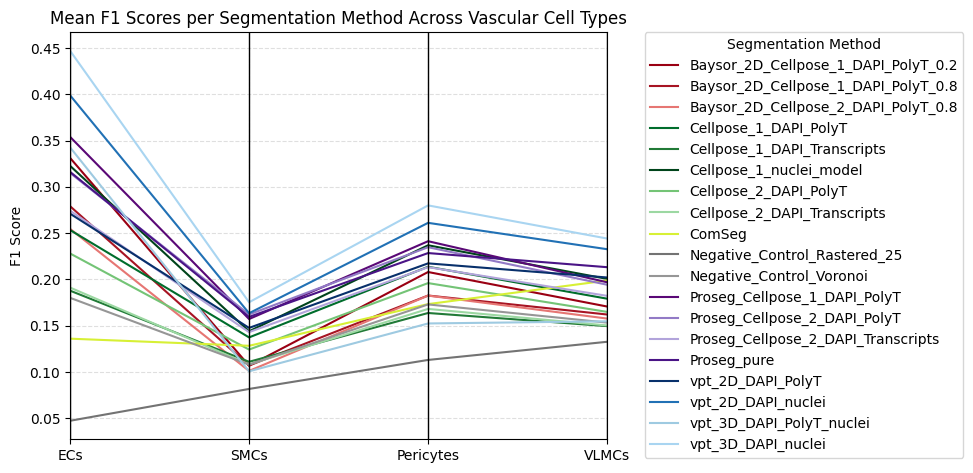

In [45]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Filter to vascular cell types
f1_vasc = f1_all[f1_all["cell_type"].isin(vascular_types)]

# Compute mean F1 per (cell type × seg_method)
df_mean = f1_vasc.groupby(["cell_type", "seg_method"])["f1_score"].mean().reset_index()

# Pivot to get seg_method as rows, cell_type as columns
df_wide = df_mean.pivot(
    index="seg_method", columns="cell_type", values="f1_score"
).reset_index()

# Reorder columns based on vascular_types (x-axis order)
df_wide = df_wide[["seg_method"] + vascular_types]

# Drop rows with any missing values
df_wide = df_wide.dropna()

# Apply consistent method colors
colors = [method_colors.get(method, "#333333") for method in df_wide["seg_method"]]

# Plot
plt.figure(figsize=(10, 5))
parallel_coordinates(df_wide, class_column="seg_method", color=colors)

# Move legend to the right
plt.legend(
    title="Segmentation Method",
    bbox_to_anchor=(1.07, 1),
    loc="upper left",
    borderaxespad=0,
)

plt.title("Mean F1 Scores per Segmentation Method Across Vascular Cell Types")
plt.ylabel("F1 Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()